In [2]:
import numpy as np
import spdepy as sp
import matplotlib.pyplot as plt


In [18]:
obs = sp.datasets.get_sinmod_validation()["data"]
resS = np.load("../results/temporal/advection-diffusion-2D-bc1.npy")
resH = np.load("../results/temporal/seperable-spatial-temporal-ani-2D-bc1.npy")

In [19]:
res1 = np.zeros([10,72,10])
res2 = np.zeros([10,72,10])

M = 50
N = 45
T = 10

def getIdx(x,y,t):
    return y*M + x + t*M*N

for j in range(10):
    uidx = np.array([getIdx(x,y,j) for x in range(M) for y in range(N)])
    res1[j,:,:] = ((resS[uidx,:,:] - obs[uidx,:][:,:,np.newaxis])**2).mean(axis = 0)
    res2[j,:,:] = ((resH[uidx,:,:] - obs[uidx,:][:,:,np.newaxis])**2).mean(axis = 0)

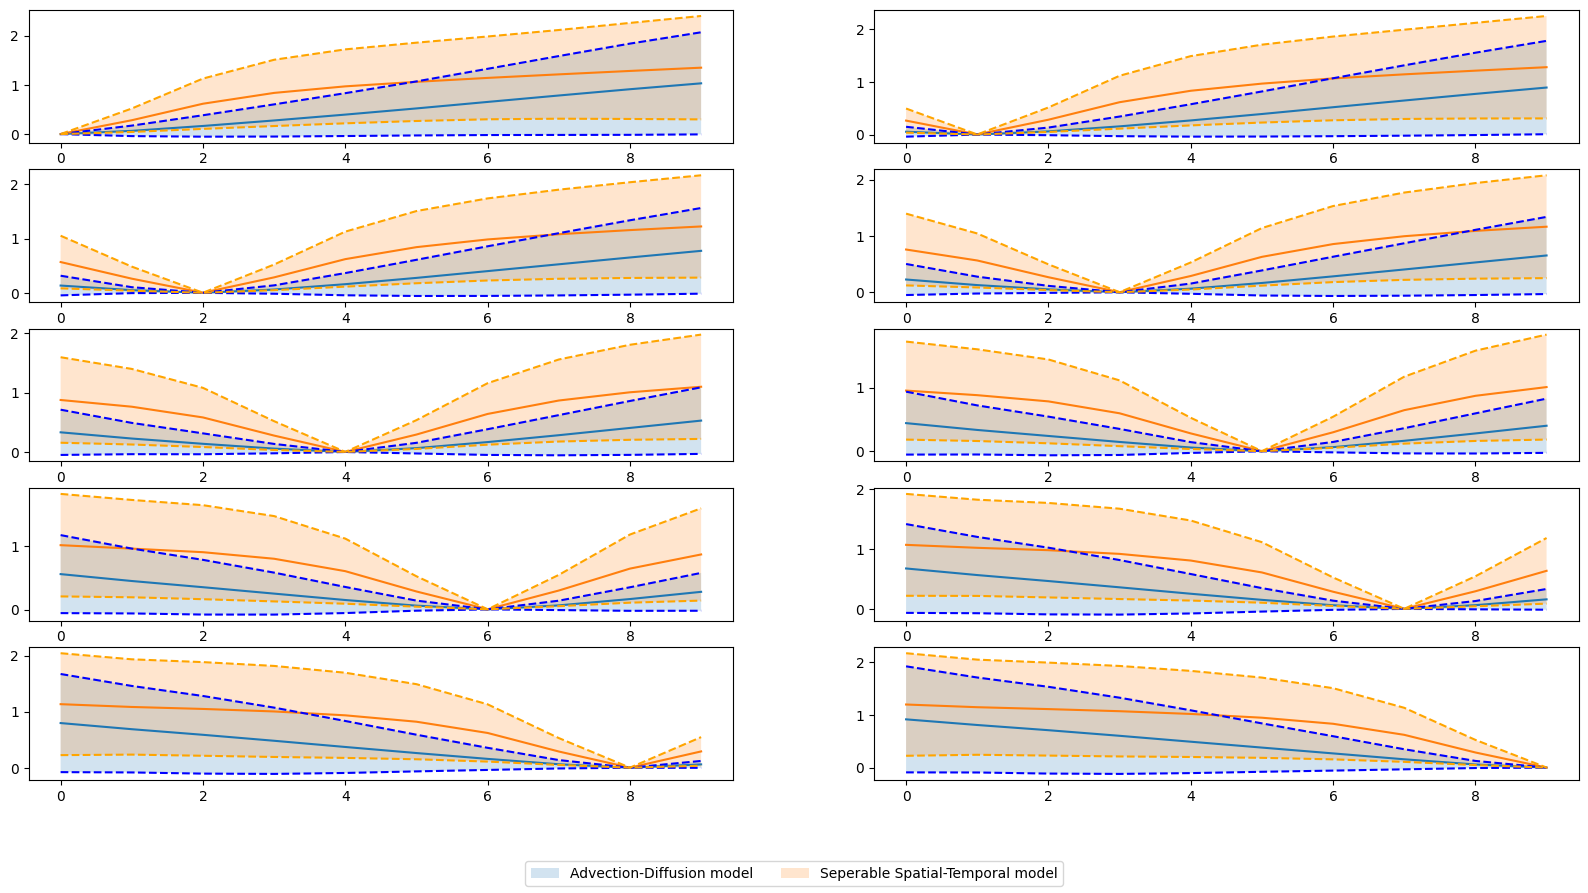

In [31]:
fig,ax = plt.subplots(figsize = (20,10),ncols=2,nrows=5)
for t in range(10):
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1),'-')
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res2[:,:,t].mean(axis=1),'-')
    if t ==9:
        ax[t//2,t%2].fill_between(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) - res1[:,:,t].std(axis=1),res1[:,:,t].mean(axis=1) + res1[:,:,t].std(axis=1),alpha = 0.2, label = "Advection-Diffusion model")
        ax[t//2,t%2].fill_between(np.arange(10,dtype = "int32"),res2[:,:,t].mean(axis=1) - res2[:,:,t].std(axis=1),res2[:,:,t].mean(axis=1) + res2[:,:,t].std(axis=1),alpha = 0.2,label = "Seperable Spatial-Temporal model")
    else: 
        ax[t//2,t%2].fill_between(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) - res1[:,:,t].std(axis=1),res1[:,:,t].mean(axis=1) + res1[:,:,t].std(axis=1),alpha = 0.2)
        ax[t//2,t%2].fill_between(np.arange(10,dtype = "int32"),res2[:,:,t].mean(axis=1) - res2[:,:,t].std(axis=1),res2[:,:,t].mean(axis=1) + res2[:,:,t].std(axis=1),alpha = 0.2)
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) - res1[:,:,t].std(axis=1),'--',color = 'blue')
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) + res1[:,:,t].std(axis=1),'--',color = 'blue')
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res2[:,:,t].mean(axis=1) - res2[:,:,t].std(axis=1),'--',color = 'orange')
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res2[:,:,t].mean(axis=1) + res2[:,:,t].std(axis=1),'--',color = 'orange')
fig.legend(loc='outside lower center', ncol = 2)

### Spatial

In [11]:
obs = sp.datasets.get_sinmod_validation()["data"]
resS = np.load("../results/spatial/advection-diffusion-2D-bc1.npy")
resH = np.load("../results/spatial/seperable-spatial-temporal-ani-2D-bc1.npy")

In [12]:
res1 = np.zeros([10,72,10])
res2 = np.zeros([10,72,10])

M = 50
N = 45
T = 10
tmp1 = np.linspace(0,M,4).astype("int32")
tmp2 = np.linspace(0,N,4).astype("int32")
res1 = ((resS - obs[:,:,np.newaxis])**2).mean(axis = 1).reshape(T,N,M,9).mean(axis = 0) 
res2 = ((resH - obs[:,:,np.newaxis])**2).mean(axis = 1).reshape(T,N,M,9).mean(axis = 0) 
def getIdx(x,y,t):
    return y*M + x + t*M*N

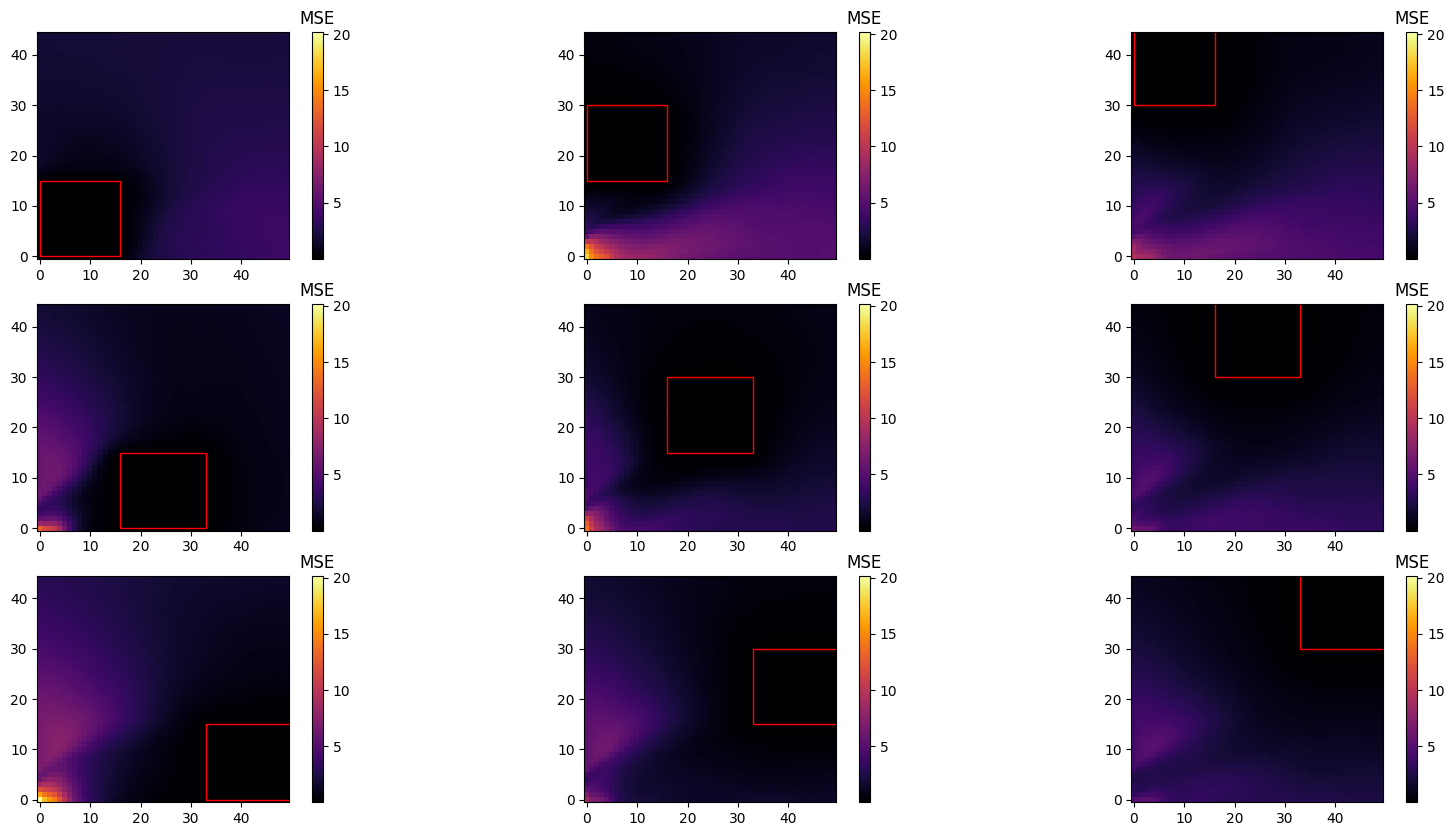

In [14]:
cmin = res1.min()
cmax = res1.max()
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize = (20,10),ncols=3,nrows=3)
im = list()
clb = list()
for t in range(9):
    im.append(ax[t//3,t%3].imshow(res1[:,:,t],origin = 'lower',vmin = cmin, vmax = cmax,cmap = 'inferno'))
    # ax[t//3,t%3].imshow(res2[:,:,t],origin = 'lower',vmin = cmin, vmax = cmax,cmap = 'inferno')
    clb.append(fig.colorbar(im[t],ax = ax[t//3,t%3]))
    clb[t].ax.set_title('MSE')
    t1 = 0 if tmp1[t//3] == 1 else tmp1[t//3]
    t2 = 0 if tmp2[t%3] == 1 else tmp2[t%3]
    rect = patches.Rectangle((t1,t2),tmp1[t//3+1]-tmp1[t//3],tmp2[t%3+1]-tmp2[t%3],linewidth=1,edgecolor='r',facecolor='none')
    ax[t//3,t%3].add_patch(rect)
    
    